<a href="https://colab.research.google.com/github/Arv-ind-s/content-moderation-system/blob/main/notebooks/01_eda_toxic_comments_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛡️ Content Moderation System - Exploratory Data Analysis

## Project Overview
This notebook performs exploratory data analysis on the **Jigsaw Toxic Comment Classification Dataset** to understand patterns in online toxicity and inform our content moderation system design.

## Objective
Analyze Wikipedia comments to:
- Understand the distribution of toxic vs. non-toxic content
- Identify patterns and characteristics of toxic language
- Assess data quality and potential challenges
- Inform preprocessing and modeling decisions

## Dataset Information
- **Source**: [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)
- **Size**: ~160,000 Wikipedia talk page comments
- **Task**: Multi-label classification across 6 toxicity categories
- **Labels**: toxic, severe_toxic, obscene, threat, insult, identity_hate

## Key Questions to Answer
1. How balanced is the dataset across toxicity categories?
2. What are the text characteristics of toxic vs. clean comments?
3. Are there patterns in toxic language (length, vocabulary, formatting)?
4. What data quality issues exist?
5. What preprocessing steps will be necessary?

## Analysis Structure
1. **Data Loading & Initial Inspection**
2. **Target Variable Analysis & Class Distribution**
3. **Text Length & Statistical Analysis**
4. **Vocabulary & Content Analysis**
5. **Data Quality Assessment**
6. **Key Findings & Recommendations**

---

**Author**: Aravind S
**Date**: December 6, 2025  
**GitHub**: https://github.com/Arv-ind-s/content-moderation-system?tab=readme-ov-file

## 0. Downloading the data from kaggle onto the notebook using kaggle API

In [7]:
# Install kaggle package
!pip install -q kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()  # Click "Choose Files" and select kaggle.json

# Move to correct location and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

# Unzip the files
!unzip -q jigsaw-toxic-comment-classification-challenge.zip

# List files to verify
!ls -lh

Saving kaggle.json to kaggle (4).json
jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)
replace sample_submission.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace test_labels.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
total 106M
-rw-r--r-- 1 root root  53M Dec 11  2019  jigsaw-toxic-comment-classification-challenge.zip
-rw-r--r-- 1 root root   69 Dec  6 17:40 'kaggle (1).json'
-rw-r--r-- 1 root root   69 Dec  6 17:44 'kaggle (2).json'
-rw-r--r-- 1 root root   69 Dec  6 17:48 'kaggle (3).json'
-rw-r--r-- 1 root root   69 Dec  6 18:40 'kaggle (4).json'
-rw-r--r-- 1 root root   69 Dec  6 17:39  kaggle.json
drwxr-xr-x 1 root root 4.0K Nov 20 14:30  sample_data
-rw-r--r-- 1 root root 1.4M Dec 11  2019  sample_submission.csv.zip
-rw-r--r-- 1 root root  24M Dec 11  2019  tes

## 1. Load Libraries and Data

In [9]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Unzip individual CSV files first
!unzip -q train.csv.zip
!unzip -q test.csv.zip
!unzip -q test_labels.csv.zip

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_labels = pd.read_csv('test_labels.csv')

print("✅ Data loaded successfully!")
print(f"Training data shape: {train.shape}")
print(f"Test data shape: {test.shape}")

✅ Data loaded successfully!
Training data shape: (159571, 8)
Test data shape: (153164, 2)


## 2. Initial Data Inspection

In [10]:
# Display first few rows
print("First 5 rows of training data:")
display(train.head())

# Column information
print("\nDataset Info:")
print(train.info())

# Check for missing values
print("\nMissing values:")
print(train.isnull().sum())

# Basic statistics
print("\nColumn names:")
print(train.columns.tolist())

First 5 rows of training data:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None

Missing values:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Column names:
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


## 3. Target Variable Distribution

Samples per toxicity category:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64

Total comments: 159571

Percentage of toxic comments per category:
toxic            9.58
obscene          5.29
insult           4.94
severe_toxic     1.00
identity_hate    0.88
threat           0.30
dtype: float64


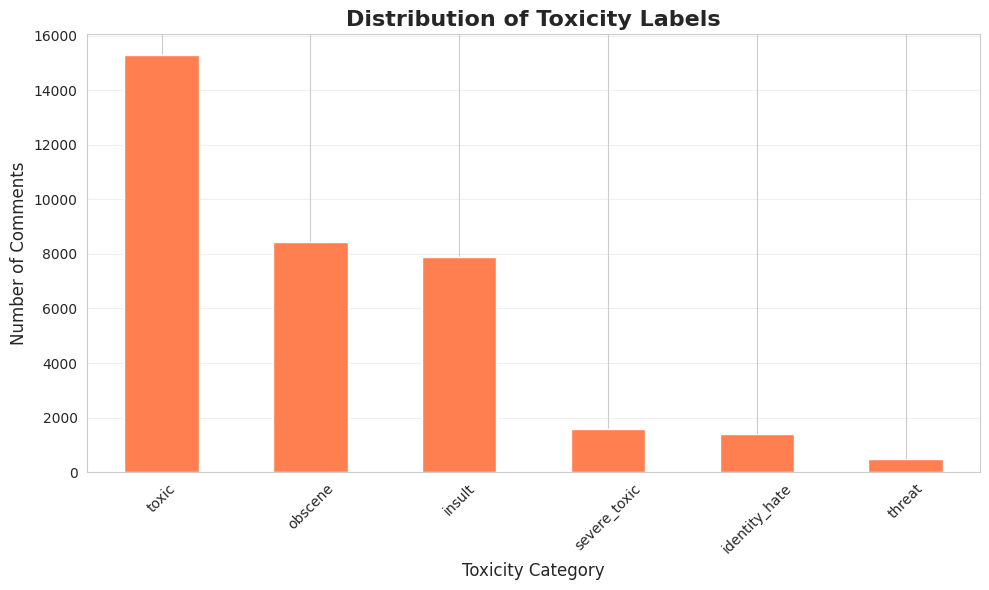

In [11]:
# Get label columns
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Count samples per category
label_counts = train[label_cols].sum().sort_values(ascending=False)
print("Samples per toxicity category:")
print(label_counts)
print(f"\nTotal comments: {len(train)}")

# Calculate percentages
label_percentages = (label_counts / len(train) * 100).round(2)
print("\nPercentage of toxic comments per category:")
print(label_percentages)

# Visualize
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Toxicity Labels', fontsize=16, fontweight='bold')
plt.xlabel('Toxicity Category', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Multi-Label Analysis

Number of labels per comment:
num_labels
0    143346
1      6360
2      3480
3      4209
4      1760
5       385
6        31
Name: count, dtype: int64

✅ Clean comments (no toxic labels): 143346 (89.83%)
⚠️ Comments with multiple labels: 9865 (6.18%)


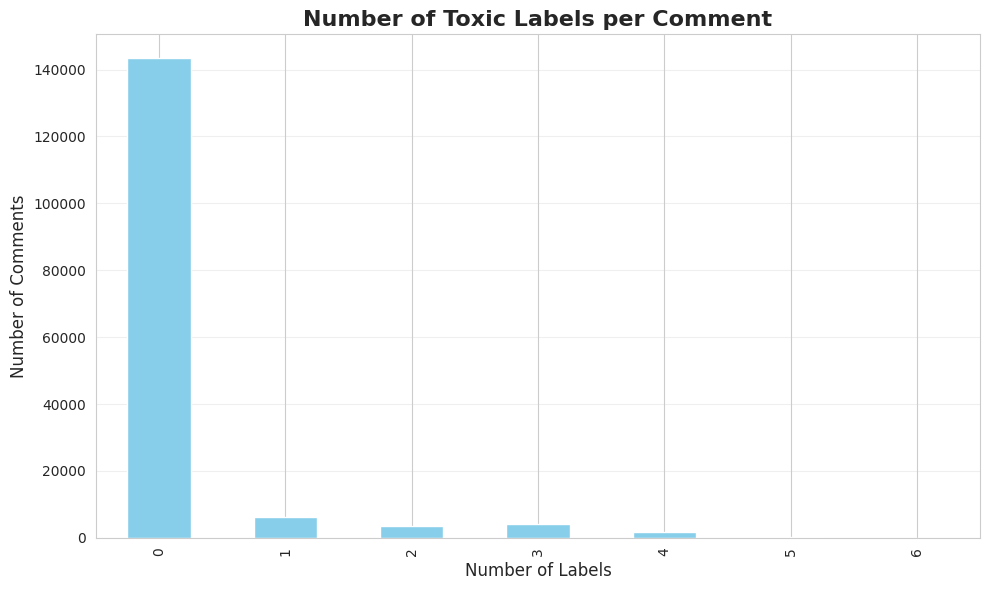

In [12]:
# Check if comments can have multiple labels
train['num_labels'] = train[label_cols].sum(axis=1)

print("Number of labels per comment:")
print(train['num_labels'].value_counts().sort_index())

# How many comments are completely clean?
clean_comments = (train['num_labels'] == 0).sum()
print(f"\n✅ Clean comments (no toxic labels): {clean_comments} ({clean_comments/len(train)*100:.2f}%)")

# How many have multiple labels?
multi_label = (train['num_labels'] > 1).sum()
print(f"⚠️ Comments with multiple labels: {multi_label} ({multi_label/len(train)*100:.2f}%)")

# Visualize
plt.figure(figsize=(10, 6))
train['num_labels'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Toxic Labels per Comment', fontsize=16, fontweight='bold')
plt.xlabel('Number of Labels', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Text Length Analysis

Text Length Statistics (characters):
count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: word_count, dtype: float64

Average length - Toxic: 295 chars
Average length - Clean: 405 chars


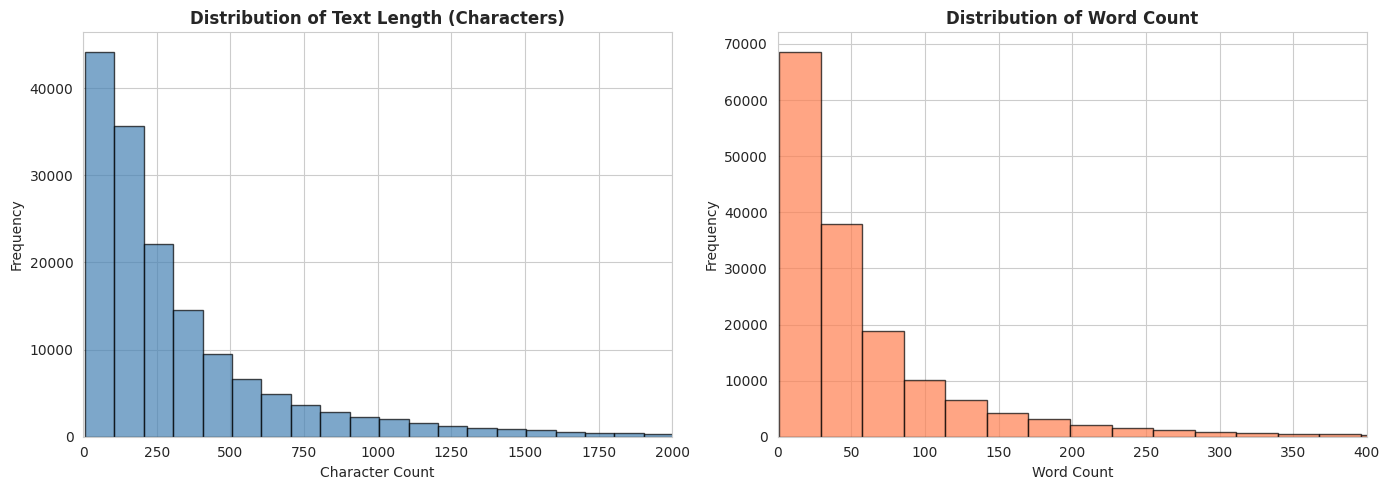

In [13]:
# Calculate text lengths
train['text_length'] = train['comment_text'].apply(len)
train['word_count'] = train['comment_text'].apply(lambda x: len(str(x).split()))

# Statistics
print("Text Length Statistics (characters):")
print(train['text_length'].describe())

print("\nWord Count Statistics:")
print(train['word_count'].describe())

# Compare toxic vs non-toxic
toxic_mask = train['toxic'] == 1
print(f"\nAverage length - Toxic: {train[toxic_mask]['text_length'].mean():.0f} chars")
print(f"Average length - Clean: {train[~toxic_mask]['text_length'].mean():.0f} chars")

# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train['text_length'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Text Length (Characters)', fontweight='bold')
axes[0].set_xlabel('Character Count')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, 2000)

axes[1].hist(train['word_count'], bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Word Count', fontweight='bold')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 400)

plt.tight_layout()
plt.show()

## Class Imbalance Analysis

In [14]:
# Calculate imbalance ratio
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

print("=" * 60)
print("CLASS IMBALANCE ANALYSIS")
print("=" * 60)

for label in label_cols:
    positive = train[label].sum()
    negative = len(train) - positive
    ratio = negative / positive if positive > 0 else 0
    percentage = (positive / len(train)) * 100

    print(f"\n{label.upper()}:")
    print(f"  Positive samples: {positive:,} ({percentage:.2f}%)")
    print(f"  Negative samples: {negative:,} ({100-percentage:.2f}%)")
    print(f"  Imbalance ratio: {ratio:.1f}:1")

# Overall toxicity
any_toxic = (train[label_cols].sum(axis=1) > 0).sum()
clean = len(train) - any_toxic

print(f"\n{'='*60}")
print(f"OVERALL:")
print(f"  Any toxic label: {any_toxic:,} ({any_toxic/len(train)*100:.2f}%)")
print(f"  Completely clean: {clean:,} ({clean/len(train)*100:.2f}%)")
print(f"  Imbalance ratio: {clean/any_toxic:.1f}:1")
print(f"{'='*60}")

CLASS IMBALANCE ANALYSIS

TOXIC:
  Positive samples: 15,294 (9.58%)
  Negative samples: 144,277 (90.42%)
  Imbalance ratio: 9.4:1

SEVERE_TOXIC:
  Positive samples: 1,595 (1.00%)
  Negative samples: 157,976 (99.00%)
  Imbalance ratio: 99.0:1

OBSCENE:
  Positive samples: 8,449 (5.29%)
  Negative samples: 151,122 (94.71%)
  Imbalance ratio: 17.9:1

THREAT:
  Positive samples: 478 (0.30%)
  Negative samples: 159,093 (99.70%)
  Imbalance ratio: 332.8:1

INSULT:
  Positive samples: 7,877 (4.94%)
  Negative samples: 151,694 (95.06%)
  Imbalance ratio: 19.3:1

IDENTITY_HATE:
  Positive samples: 1,405 (0.88%)
  Negative samples: 158,166 (99.12%)
  Imbalance ratio: 112.6:1

OVERALL:
  Any toxic label: 16,225 (10.17%)
  Completely clean: 143,346 (89.83%)
  Imbalance ratio: 8.8:1


## 6. Vocabulary Analysis - Word Clouds

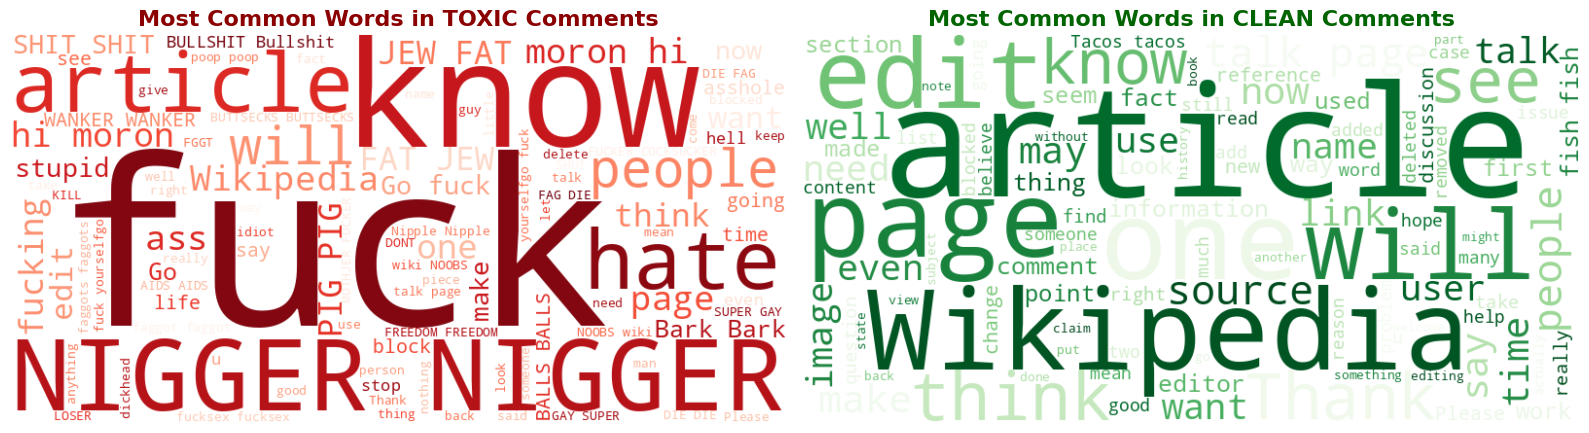

In [16]:
# Separate toxic and clean comments
toxic_text = ' '.join(train[train['toxic'] == 1]['comment_text'].values)
clean_text = ' '.join(train[train['toxic'] == 0]['comment_text'].sample(15000).values)  # Sample for performance

# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Toxic word cloud
wc_toxic = WordCloud(width=800, height=400,
                     background_color='white',
                     colormap='Reds',
                     max_words=100).generate(toxic_text)

axes[0].imshow(wc_toxic, interpolation='bilinear')
axes[0].set_title('Most Common Words in TOXIC Comments', fontsize=16, fontweight='bold', color='darkred')
axes[0].axis('off')

# Clean word cloud
wc_clean = WordCloud(width=800, height=400,
                     background_color='white',
                     colormap='Greens',
                     max_words=100).generate(clean_text)

axes[1].imshow(wc_clean, interpolation='bilinear')
axes[1].set_title('Most Common Words in CLEAN Comments', fontsize=16, fontweight='bold', color='darkgreen')
axes[1].axis('off')

plt.tight_layout()
plt.show()

## 7. Key Findings & Insights

### 🔴 Critical Challenges Identified

1. **Severe Class Imbalance**
   - Only ~10% of comments are toxic
   - Imbalance ratio: 8.8:1 (clean:toxic)
   - **Impact**: Model will be biased toward predicting "clean"
   - **Solution**: Use class weighting, appropriate metrics (F1-score), and stratified sampling

2. **Multi-Label Complexity**
   - 6.18% of comments have multiple toxic labels simultaneously
   - This is a multi-label classification problem, not simple binary
   - **Impact**: Need to handle label correlation and multiple predictions per comment
   - **Solution**: Use multi-label loss functions (Binary Cross-Entropy) and predict each label independently

3. **Extreme Imbalance in Subcategories**
   - "Threat" category has <1% positive samples (most severe imbalance)
   - "Severe toxic" and "identity hate" also critically underrepresented
   - **Impact**: Model may fail to detect rare but serious categories
   - **Solution**: Consider category-specific thresholds and focal loss for rare classes

### 📊 Data Characteristics

- Total training samples: 159,571
- Average comment length: 394 characters (~60-70 words)
- Multi-label instances: 6.18%
- Most common toxic category: toxic (9.58%)
- Least common toxic category: threat (0.30%)
- Clean comments: ~90% of dataset
- Text length range: Very short (few words) to very long (1000+ characters)

### 🎯 Recommendations for Model Development

1. **Evaluation Metrics**: Use F1-score, Precision, Recall, and AUC-ROC (NOT accuracy)

2. **Handling Imbalance**:
   - Apply class weights during training (inverse frequency weighting)
   - Consider focal loss for hard-to-classify examples
   - Use stratified train-test split to maintain class distribution

3. **Model Selection**:
   - Use pre-trained transformer models (DistilBERT, RoBERTa) for better context understanding
   - Fine-tune on this specific task rather than training from scratch
   - Consider multi-task learning approach for correlated labels

4. **Text Preprocessing**:
   - Handle special characters, URLs, and formatting
   - Consider keeping capitalization (CAPS often indicate toxicity)
   - Remove or handle very short comments (< 10 characters)

5. **Validation Strategy**:
   - Use stratified K-fold cross-validation
   - Monitor performance on each toxic category separately
   - Set category-specific confidence thresholds

### ❓ Open Questions

1. **Context Dependency**: How will the model handle sarcasm, jokes, or context-dependent language that might appear toxic but isn't malicious?

2. **Edge Cases**: What about borderline cases like strong criticism vs. personal attacks? How do we define the boundary?

3. **Real-time Performance**: Can transformer models meet latency requirements (<500ms) for real-time moderation on AWS Lambda?

4. **False Positive Trade-off**: What's the acceptable false positive rate? Over-filtering might frustrate users, under-filtering allows toxic content.

5. **Model Bias**: Are certain topics or communities over-represented in toxic labels? Could the model learn unintended biases?

6. **Threshold Tuning**: Should we use different confidence thresholds for different toxic categories based on severity?

---

## 📌 Next Steps

Based on this EDA, the following steps are planned:

1. ✅ **Data Preprocessing Pipeline**
   - Text cleaning and normalization
   - Tokenization for transformer models
   - Train-validation-test split (stratified)

2. ✅ **Model Development**
   - Baseline: Pre-trained DistilBERT (lightweight for Lambda deployment)
   - Fine-tuning with class weights
   - Multi-label binary cross-entropy loss

3. ✅ **Evaluation Framework**
   - Per-category F1-scores
   - Confusion matrices for each label
   - Error analysis on false positives/negatives

4. ✅ **Deployment Preparation**
   - Model optimization for inference speed
   - API development with FastAPI
   - AWS Lambda packaging and testing

---

**Analysis Date**: December 6, 2025  
**Analyst**: Aravind S
**Status**: EDA Complete ✅ | Ready for Preprocessing Phase